**Data Mining Lab 2: Classifiers, University of Victoria, Summer 2023** <br>
**TA: Jonas Buro (buro@uvic.ca)**

# Lab 2
1. Binary Classification
2. Performance Measures for Classifiers
3. Classification Excercise

# 1) Binary Classification

The task in binary classification is to design or learn a function $f$, which when applied to feature vector $x$ drawn from the feature space $X$, outputs predicted label $\hat{y}$ which is equal to $x$'s true label $y$ with high probability.

$$ f(x) = \hat{y}$$

Sometimes, it is clear how the the features of $x$ impact its true label $y$. If this relationship is easy to express, then we can explicitly define  $f$ and be sure that it will output the correct classification for any $x \in X$.

Often, it is not clear how the features combine to determine its true label, or, if it is, the relationship is difficult to express. In such instances, supervised machine learning methods can be used to approximate $f$.

Some applications of binary classification include:
- Detecting spam (is this email spam?)
- Disease diagnosis (does this patient have cancer?)
- Object recognition (does this image contain a dog?)



Some common machine learning methods for binary classification are:
- Decision Trees
- Random Forests
- SVMs
- Neural Networks
- Logistic Regressors

The selection of which model to use depends on the type and quantity of the data; each model has tradeoffs. By experimenting with multiple models and evaluating their performance, the analyst can determine the best choice for the problem at hand, as well as develop intuition for which models fare better under different circumstances.

# 2) Performance Metrics for Classifiers

 In predictive modeling using regression, where the goal is to predict a numerical $\hat{y}$, the analyst is much more interested in knowing by HOW MUCH the predictions are incorrect, not if they ARE incorrect, hence the use of error based evaluation metrics, as opposed to accuracy (ratio of correct predictions).

Determining the performance of classifiers is not as straightforward as it is for regressors. For classifiers, accuracy is sometimes not an acceptable metric. Consider a case where the data polarizes heavily towards one class, in this case, the model might achieve high accuracy by learning to just predict the majority class, thus performing poorly on the minority class.

A better indicator is to look at the Confusion Matrix:

<p align="center">
<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Confusion Matrix" width="35%" height="35%">
</p>

<p align="center">
<img src="https://onestopdataanalysis.com/wp-content/uploads/2020/02/confusion_matrix.png" alt="Confusion Matrix" width="35%" height="35%">
</p>

## Precision and Recall

Accuracy evaluates proportion of all correct predictions: $$ a = \frac{TP + TN}{TP + TN + FP + FN} $$

Precision evaluates proportion of positive predictions which are actually correct: $$p = \frac{TP}{TP + FP}$$

Recall evaluates proportion of actual positives which are correctly identified:  $$r = \frac{TP}{TP + FN}$$

These two metrics are in an inverse relationship: Improving precision means reducing FP, which means the model is less likely to make positive predictions. This might result in increasing FNs, reducing recall. 

Conversely, improving recall means reducing FN, which means the model is more likely to make positive predictions. This might result in more FP, reducing precision. $$ FP \propto FN $$

Context determines which of these is the more valuable metric. Determine which is more important: FP or FN.

Consider the problem of cancer prediction in patients. Here, the analyst wants a model with high recall: if someone has cancer, and the model classifies them as being cancer-free (FN), this might be catastrophic as it might be a matter of life or death.

In the spam detection problem, the analyst wants a model which has high precision: if a mail is not spam, but is classified as such (FP), it is inconvenient for the user.


## F measure
Method for striking balance between precision and recall. $$ F_{\beta} = (1 + \beta^2) \frac{Precision * Recall}{(\beta^2 * Precision) + Recall}  $$

Here, $\beta$ is a tuning parameter, which allows the analyst to specify the importance of one metric relative to the other.



# 3) Excercise: Titanic Survivor Prediction

The task is to use data from the sinking of the Titanic to predict whether or not a passenger survived or not.

The data and information about it is located here: https://www.kaggle.com/competitions/titanic/data

Steps:

1. Get the data
2. Investigate the data
3. Prepare the data for ML
4. Select a model and train it
5. Evaluate your model

In [1]:
import os
import urllib.request

# Fetch data
TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()

In [19]:
import pandas as pd
# Load data

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

print(test_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [73]:
# Inspect the data shape and integrity
# .head(), .info(), .describe(), .value_counts()

#train_data.info()

td = train_data.drop("Cabin", axis=1)
td = td.drop("Ticket", axis=1)
td["Age"]= td["Age"].fillna(value=td["Age"].mean())
print(td["Embarked"].value_counts().index[0])
ms= td["Embarked"].value_counts().index[0]

td["Embarked"] = td["Embarked"].fillna(value=ms)

td.head()

# Consider feature engineering at this point, such as replacing null values with medians, removing columns, etc

S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

# Prepare data for ML algorithms by building a preprocessing pipeline for numeric and categorical values

le = LabelEncoder()
td = td.apply(le.fit_transform)

# apply pipeline to train_data
# x_train = ...

# extract labels from train_data into train_labels
y_train = td["Survived"]
x_train = td.drop(columns=["Survived"])
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,108,1,28,1,0,18,2
1,1,0,190,0,52,1,0,207,0
2,2,2,353,0,34,0,0,41,2
3,3,0,272,0,48,1,0,189,2
4,4,2,15,1,48,0,0,43,2
...,...,...,...,...,...,...,...,...,...
886,886,1,548,1,35,0,0,85,2
887,887,0,303,0,24,0,0,153,2
888,888,2,413,0,39,1,2,131,2
889,889,0,81,1,34,0,0,153,0


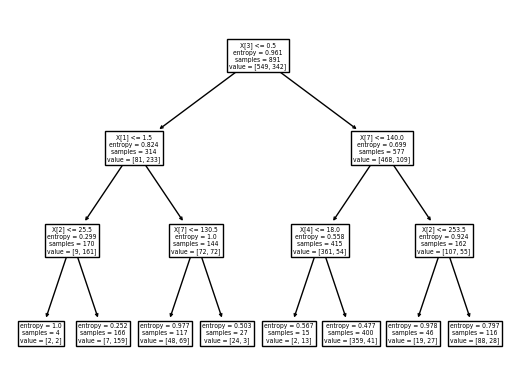

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=3, criterion="entropy")
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)
plt.show()

# Select a model and train it using x_train, y_train

In [80]:
# Evaluate model 
# k fold cross validation, confusion matrix
from sklearn.model_selection import cross_val_score

clf_score = cross_val_score(clf, x_train, y_train, cv=10)
print(clf_score)

[0.82222222 0.84269663 0.7752809  0.83146067 0.82022472 0.78651685
 0.79775281 0.78651685 0.84269663 0.82022472]
